In [136]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

Работу выполнила ученица группы 381803-1 Гондурова Дарья.

# Страхование автомобилей
Ставится задача определения рисков наступления страхового случая в страховании транспортных средств (наступит или нет страховой случай).

Выведем таблицу с данным и проанализируем имеющиеся признаки.

In [103]:
df = pd.read_csv('Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [104]:
df.shape

(10000, 19)

In [105]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

Всего имеется 19 признаков и 10000 исследуемых объектов.

### Признаки имеют имена:
- ID                   - индентификатор водителя
- AGE                  - возраст
- GENDER               - пол
- RACE                 - стиль вождения
- DRIVING_EXPERIENCE   - опыт вождения
- EDUCATION            - образование
- INCOME               - уровень дохода
- CREDIT_SCORE         - кредитный рейтинг
- VEHICLE_OWNERSHIP    - владение транспортным средством
- VEHICLE_YEAR         - год выпуска транспортного средства
- MARRIED              - нахождение в браке
- CHILDREN             - наличие детей
- POSTAL_CODE          - почтовый индекс
- ANNUAL_MILEAGE       - годовой пробег
- VEHICLE_TYPE         - тип транспортного средства
- SPEEDING_VIOLATIONS  - количество превышений скорости
- DUIS                 - количество нарушений, связанных с вождением в нетрезвом виде
- PAST_ACCIDENTS       - количество предыдущих инцидентов 
- OUTCOME              - исход (0 - не требуется страховая выплата, 1 - требуется)

Выведем тип данных всех столбцов, представленных в таблице:

In [106]:
 df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

Видим, что 8 признаков имеют тип данных "Object". Заменим тип на специальный, предназначенный для хранения категориальных значений, а также изменим тип данных для бинарных признаков:

In [107]:
df["AGE"] = df["AGE"].astype('category')
df["DRIVING_EXPERIENCE"] = df["DRIVING_EXPERIENCE"].astype('category')
df["EDUCATION"] = df["EDUCATION"].astype('category')
df["INCOME"] = df["INCOME"].astype('category')
df["VEHICLE_TYPE"] = df["VEHICLE_TYPE"].astype('category')
df["VEHICLE_YEAR"] = df["VEHICLE_YEAR"].astype('category')
df["GENDER"] = df["GENDER"].astype('category')
df["RACE"] = df["RACE"].astype('category')

df["MARRIED"] = df["MARRIED"].astype('bool')
df["VEHICLE_OWNERSHIP"] = df["VEHICLE_OWNERSHIP"].astype('bool')
df["CHILDREN"] = df["CHILDREN"].astype('bool')
df["OUTCOME"] = df["OUTCOME"].astype('bool')

df["AGE"].dtype, df["DRIVING_EXPERIENCE"].dtype, df["EDUCATION"].dtype, df["INCOME"].dtype, df["VEHICLE_TYPE"].dtype, df["VEHICLE_YEAR"].dtype, df["GENDER"].dtype, df["RACE"].dtype, df["MARRIED"].dtype, df["VEHICLE_OWNERSHIP"].dtype, df["CHILDREN"].dtype, df["OUTCOME"].dtype

(CategoricalDtype(categories=['16-25', '26-39', '40-64', '65+'], ordered=False),
 CategoricalDtype(categories=['0-9y', '10-19y', '20-29y', '30y+'], ordered=False),
 CategoricalDtype(categories=['high school', 'none', 'university'], ordered=False),
 CategoricalDtype(categories=['middle class', 'poverty', 'upper class', 'working class'], ordered=False),
 CategoricalDtype(categories=['sedan', 'sports car'], ordered=False),
 CategoricalDtype(categories=['after 2015', 'before 2015'], ordered=False),
 CategoricalDtype(categories=['female', 'male'], ordered=False),
 CategoricalDtype(categories=['majority', 'minority'], ordered=False),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'),
 dtype('bool'))

## Визуализация и описательная статистика

Получим сводную информацию о количественных признаках. Найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей:

In [108]:
df.describe()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


Из этих данных можно сделать несколько выводов об объектах, представленных в таблице: большинство обратившихся в страховую компанию ранее не имели зафикированных превышений скорости, не попадали в страховые случаи и не были замечены в вождении в нетрезвом виде. При этом максимальное количество превышений скорости на одного человека = 22, максимальное количество вождений в нетрезвом виде = 6 и максимальное число попадания в ситуации, предусмотренные страховкой, = 15. Верхняя квартиль коэффициента, определяемого кредитной компанией, = 0.6 из максимально возможного 1. Самый высокий кредитный рейтинг = 0.96.

Получим информацию о категориальных признаках:

In [109]:
df.describe(include=['category'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Видим, что основная категория водителей, обратившихся в страховую компанию, - люди 26-39 лет, с маленьким водительским стажем - от 0 до 9ти лет. Большинство из них - женщины. 9523 машины из 10000 - седаны, а владельцы в основном являются представителями верхнего класса и окончившими старшую школу.

Получим информацию о бинарных признаках:

In [110]:
df.describe(include=['bool'])

,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,OUTCOME
count,10000,10000,10000,10000
unique,2,2,2,2
top,True,False,True,False
freq,6970,5018,6888,6867


Можно заметить, что 6970 автолюбителей из 10000 являются владельцами автомобилей. 5018 не женаты/ не замужем, при этом у 6888 имеются дети. в 6867 случаев из 10000 не происходит страховых выплат.

Для количественных и бинарных признаков построим матрицу корреляции:

In [111]:
df_corr = df.corr()
df_corr

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


Видим, что наиболее коррелирующие с признаком "OUTCOME" являются признаки "VEHICLE_OWNERSHIP", "CREDIT_SCORE", "PAST_ACCIDENTS". Причем они коррелируют со знаком минус, что говорит о том, на большинстве объектов пара признаков отклоняется от своих средних в разные стороны.

Для неучтенных качественных признаков построим гистограммы:

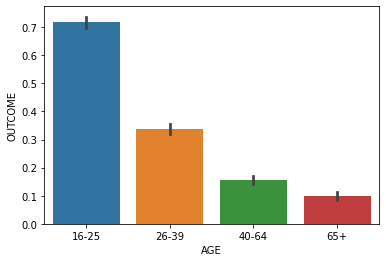

In [112]:
sns.barplot(data=df, x="AGE", y="OUTCOME")

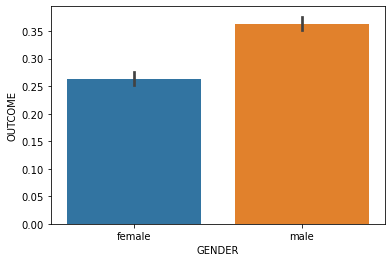

In [113]:
sns.barplot(data=df, x="GENDER", y="OUTCOME")

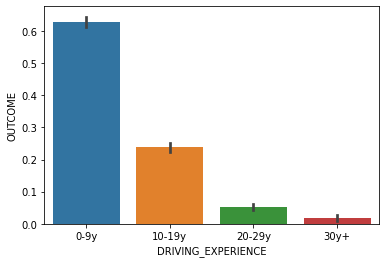

In [114]:
sns.barplot(data=df, x="DRIVING_EXPERIENCE", y="OUTCOME")

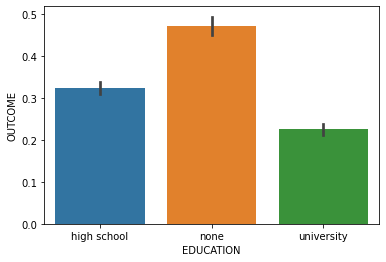

In [115]:
sns.barplot(data=df, x="EDUCATION", y="OUTCOME")

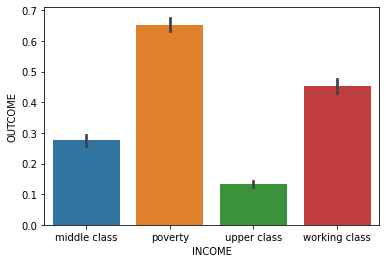

In [116]:
sns.barplot(data=df, x="INCOME", y="OUTCOME")

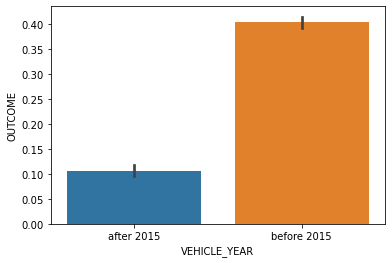

In [117]:
sns.barplot(data=df, x="VEHICLE_YEAR", y="OUTCOME")

Таким образом, можем увидеть, что наиболее подверженная к наступлению страхового случая группа населения - люди 16-25 лет и с опытом вождения 0-9 лет. Женщины в целом водят аккуратнее, в аварии чаще попадают люди с маленьким доходом, без образования и на машинах, выпущенных ранее 2015 года.

## Обработка пропущенных значений

Найдем столбцы, в которых имеются пропущенные значения и количество таких значений:

In [118]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Видим, что признаки "CREDIT_SCORE" и "ANNUAL_MILEAGE" имеют пропущенные значения. Это количественные признаки, поэтому заполним пропущенные значения медианой:

In [119]:
df.fillna(df.median(axis = 0), axis=0 , inplace=True)
df.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [120]:
df.describe()

,ID,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.516718,19864.548400,11726.000000,1.482900,0.23920,1.056300
std,290030.768758,0.130781,18915.613855,2681.649329,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.431509,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.607607,32765.000000,13000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


## Обработка выбросов

Рассмотрим признак "SPEEDING_VIOLATIONS":

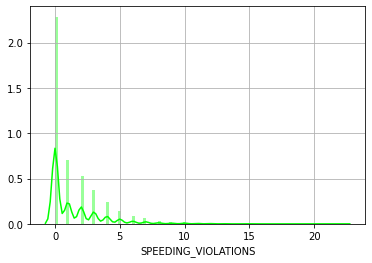

In [121]:
sns.distplot(df["SPEEDING_VIOLATIONS"], bins=100, color = 'lime')
plt.grid()
pass

In [122]:
df["SPEEDING_VIOLATIONS"].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     0.0
0.900     4.0
0.950     6.0
0.990    10.0
0.995    12.0
Name: SPEEDING_VIOLATIONS, dtype: float64

Видим, что большинство клиентов страховой компании не имеют превышений скорости в прошлом, при этом в 95% количесво превышений 0-6. Максимальное количесво превышений - 22 - выбивается из общей статистики. 

Обратим внимание на то, что количество нарушений, связанных с вождением в нетрезвом виде, в основном до двух. Водителей, нарушающих больше двух раз, всего 81.

In [123]:
df.loc[df.DUIS >= 3].shape

(81, 19)

Далее рассмотрим признак "POSTAL_CODE":

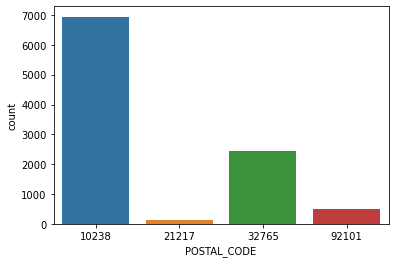

In [124]:
sns.countplot(x="POSTAL_CODE", data=df)
pass

In [125]:
df.loc[df.POSTAL_CODE == 21217].shape

(120, 19)

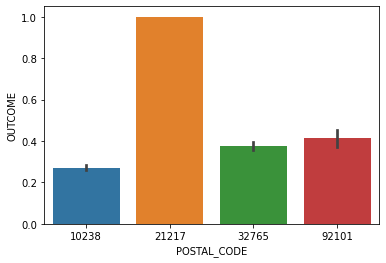

In [126]:
sns.barplot(x="POSTAL_CODE", y="OUTCOME", data=df)
pass

Видим, что количество водителей, зарегестрированных по почтовому индексу 21217 = 120, при этом все они получили страховую выплату. Избавимся от рассмотренных объектов, выбивающихся из общей статистики.

In [127]:
rows_to_drop = df[(df["POSTAL_CODE"] == 21217)|(df['DUIS'] > 2)|(df["SPEEDING_VIOLATIONS"]>20)].index
df = df.drop(rows_to_drop)
df.shape

(9798, 19)

## Обработка категориальных признаков

Для дальнейшей обработки данных закодируем категориальные признаки с помощью числовых. 

Бинарные признаки "GENDER", "RACE", "VEHICLE_YEAR", "VEHICLE_TYPE" заменим на числовые (0 и 1). К небинарным признакам "AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME" применим метод бинаризации (one-hot encoding).

In [128]:
df['GENDER'] = pd.factorize(df['GENDER'])[0]
df['RACE'] = pd.factorize(df['RACE'])[0]
df['VEHICLE_YEAR'] = pd.factorize(df['VEHICLE_YEAR'])[0]
df['VEHICLE_TYPE'] = pd.factorize(df['VEHICLE_TYPE'])[0]

AGE_dummies = pd.get_dummies(df['AGE'])
DRIVING_EXPERIENCE_dummies = pd.get_dummies(df['DRIVING_EXPERIENCE'])
EDUCATION_dummies = pd.get_dummies(df['EDUCATION'])
INCOME_dummies = pd.get_dummies(df['INCOME'])

AGE_dummies.head()

,16-25,26-39,40-64,65+
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0


Добавим dummy-столбцы к таблице и удалим "AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME":

In [129]:
data = pd.concat((df, AGE_dummies), axis=1)
data = pd.concat((data, DRIVING_EXPERIENCE_dummies), axis=1)
data = pd.concat((data, EDUCATION_dummies), axis=1)
data = pd.concat((data, INCOME_dummies), axis=1)

data = data.drop(['AGE'], axis=1)
data = data.drop(['DRIVING_EXPERIENCE'], axis=1)
data = data.drop(['EDUCATION'], axis=1)
data = data.drop(['INCOME'], axis=1)
data.head()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,10-19y,20-29y,30y+,high school,none,university,middle class,poverty,upper class,working class
0,569520,0,0,0.629027,True,0,False,True,10238,12000.0,...,0,0,0,1,0,0,0,0,1,0
1,750365,1,0,0.357757,False,1,False,False,10238,16000.0,...,0,0,0,0,1,0,0,1,0,0
2,199901,0,0,0.493146,True,1,False,False,10238,11000.0,...,0,0,0,1,0,0,0,0,0,1
3,478866,1,0,0.206013,True,1,False,True,32765,11000.0,...,0,0,0,0,0,1,0,0,0,1
4,731664,1,0,0.388366,True,1,False,False,32765,12000.0,...,1,0,0,0,1,0,0,0,0,1


## Нормализация признаков

Нормализация (normalization) и стандартизация (standardization) являются методами изменения диапазонов значений – шкалирования. Разные атрибуты могут измеряться в разных диапазонах, или значения одного атрибута варьируются слишком сильно. Например, один атрибут может имеет диапазон от 0 до 1, а второй — от 1 до 1000. Тогда второй атрибут оказывает большее влияние на обучение, хотя не факт, что он является более важным, чем первый. 

- Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения,

- Стандартизация изменяет форму распределения данных (приводится к нормальному распределению).

В дальнейшем мы будем использовать алгоритм k ближайших соседей, основанный на измерении расстояний, в таких случаях лучше применять стандартизацию. Выполним стандартизацию всех признаков:

In [130]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,10-19y,20-29y,30y+,high school,none,university,middle class,poverty,upper class,working class
0,0.235153,-0.995265,-0.332787,0.862155,0.661563,-1.519468,-0.992830,0.674826,-0.501360,0.099576,...,-0.704799,-0.513875,-0.338621,1.182783,-0.487888,-0.801056,-0.520849,-0.474538,1.147725,-0.454565
1,0.859953,1.004655,-0.332787,-1.209036,-1.511416,0.658058,-0.992830,-1.481712,-0.501360,1.590821,...,-0.704799,-0.513875,-0.338621,-0.845377,2.049441,-0.801056,-0.520849,2.107097,-0.871200,-0.454565
2,-1.041841,-0.995265,-0.332787,-0.175322,0.661563,0.658058,-0.992830,-1.481712,-0.501360,-0.273235,...,-0.704799,-0.513875,-0.338621,1.182783,-0.487888,-0.801056,-0.520849,-0.474538,-0.871200,2.199682
3,-0.078047,1.004655,-0.332787,-2.367628,0.661563,0.658058,-0.992830,0.674826,0.680277,-0.273235,...,-0.704799,-0.513875,-0.338621,-0.845377,-0.487888,1.248225,-0.520849,-0.474538,-0.871200,2.199682
4,0.795343,1.004655,-0.332787,-0.975333,0.661563,0.658058,-0.992830,-1.481712,0.680277,0.099576,...,1.418700,-0.513875,-0.338621,-0.845377,2.049441,-0.801056,-0.520849,-0.474538,-0.871200,2.199682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.615981,-0.995265,-0.332787,0.509103,0.661563,0.658058,-0.992830,-1.481712,-0.501360,1.590821,...,1.418700,-0.513875,-0.338621,-0.845377,-0.487888,1.248225,-0.520849,-0.474538,1.147725,-0.454565
9996,1.412670,-0.995265,-0.332787,0.046752,0.661563,-1.519468,-0.992830,0.674826,0.680277,0.099576,...,1.418700,-0.513875,-0.338621,-0.845377,2.049441,-0.801056,1.919745,-0.474538,-0.871200,-0.454565
9997,-0.114175,1.004655,-0.332787,-0.344865,0.661563,0.658058,-0.992830,0.674826,-0.501360,0.845198,...,-0.704799,-0.513875,-0.338621,1.182783,-0.487888,-0.801056,1.919745,-0.474538,-0.871200,-0.454565
9998,1.388876,-0.995265,-0.332787,-1.159960,-1.511416,0.658058,-0.992830,0.674826,-0.501360,0.472387,...,1.418700,-0.513875,-0.338621,1.182783,-0.487888,-0.801056,-0.520849,2.107097,-0.871200,-0.454565


## Отбор признаков

Для определения рисков наступления страхового случая будем использовать все входные признаки, кроме "ID":

In [131]:
X = data_stand.drop(["ID", "OUTCOME"], axis=1)
y = data["OUTCOME"]

Разобьем данные на обучающую и тестовую выборку в пропорции 3:1 (75% обучающей выборки, 25% - тестовой)

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train.shape, X_test.shape

((7348, 28), (2450, 28))

## Классификатор

Проведем обучение с помощью k-nearest neighbors algorithm (k-NN) и вычислим ошибки на обучающей выборке и тестовой:

In [133]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [134]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.12792596624931954, 0.17795918367346938)

## Итоги

В ходе данной работы была обучена модель, способная предсказать наступит страховой случай или нет. Обучение проводилось с помощью метода ближайших k-соседей. Путем подбора оптимальных параметров метода и предварительной обработки данных, был получен процент ошибок на обучающей выборке: 12.8%, на тестовой выборке: 17.8%. Т.к. в наступлении страхового случая доля случайности велика и предсказать наверняка, наступит такой случай или нет невозможно, то это объясняет данный процент ошибок. Кроме того, возможно, при составлении таблицы автор учел не все влияющие на исход признаки. Возможное улучшение результатов: применение другого метода обучения модели.